# Matplotlib and Seaborn

In [1]:
# import package
import pandas as pd
import seaborn as sns

# Searborn

## (1) Customer profile analysis
A mall has gathered data on their customers through a loyalty program. They have information about age, gender, annual income and spending score. Spending Score is a measure from 0 to 100, created for each customer based on customer behavior and purchasing data.

**(1.1) Import dataset <code>customers.csv</code> and use the column <code>CustomerID</code> as the index. Rename the columns according to the table below.**<br>

|column name| new column name|
|:-:|:-:|
|Gender|gender|
|Age|age|
|Annual Income (k$)|income|
|Spending Score (1-100)|spending_score|

In [2]:
#put your code here
customer_df = pd.read_csv("../dataset/customers.csv", index_col = "CustomerID")
customer_df.columns = ['gender', 'age', 'income', 'spending_score']
customer_df.head(5)

,gender,age,income,spending_score
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


**(1.2) Use a histogram to show the spending_score distribution of male and female.**<br>

<AxesSubplot:xlabel='spending_score', ylabel='Count'>

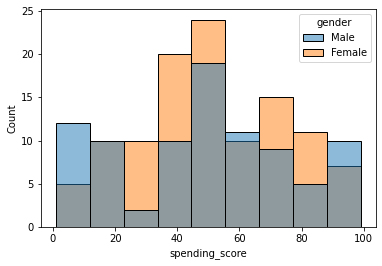

In [3]:
#put your code here
sns.histplot(data = customer_df,  x = "spending_score", hue = "gender")

**(1.3)  Use a scatter plot to show the relationship between <code>income</code> and <code>spending_score</code>. Color points by <code>gender</code>.**

<AxesSubplot:xlabel='income', ylabel='spending_score'>

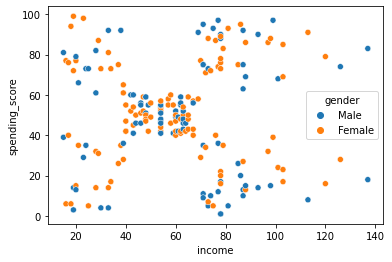

In [4]:
#put your code here
sns.scatterplot(data = customer_df, x ="income", y = "spending_score", hue = "gender")

**(1.4) Use a scatter plot to show the relationship between <code>income</code> and <code>spending_score</code>. Color points by <code>age</code>.**

<AxesSubplot:xlabel='income', ylabel='spending_score'>

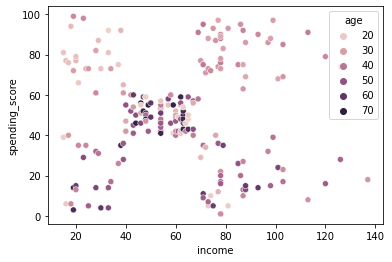

In [5]:
#put your code here
sns.scatterplot(data = customer_df, x ="income", y = "spending_score", hue = "age")

**(1.5) Use a joint plot to show the relationship between <code>income</code> and <code>spending_score</code>, and their individual distribution.**

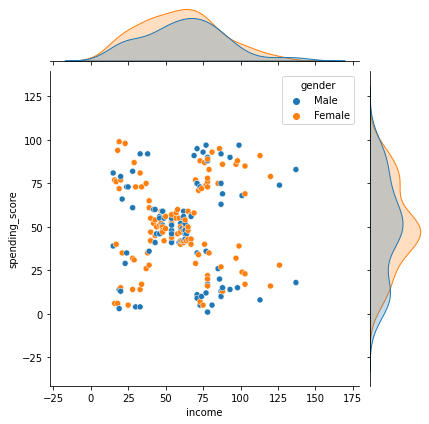

In [6]:
#put your code here
sns.jointplot(data = customer_df, x ="income", y = "spending_score", hue = "gender")

**(1.6) Use pair plot to show the relationship between the following variables: age, income, spending_score.**

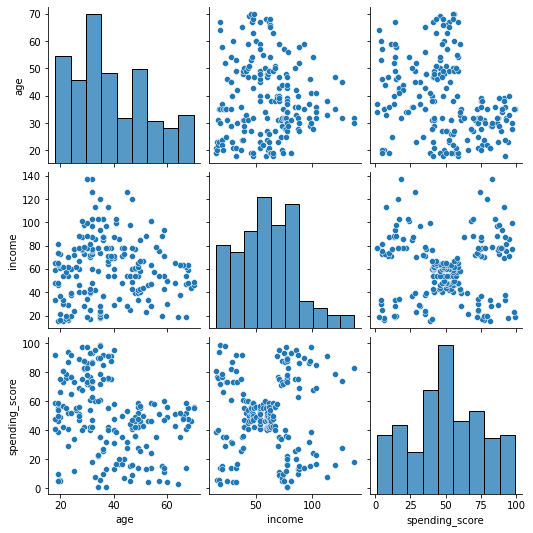

In [7]:
sns.pairplot(data = customer_df.loc[:,["age", "income","spending_score"]])

**(1.7) Use pair plot to show the relationship between the following variables: age, income, spending_score. Color points by gender.**

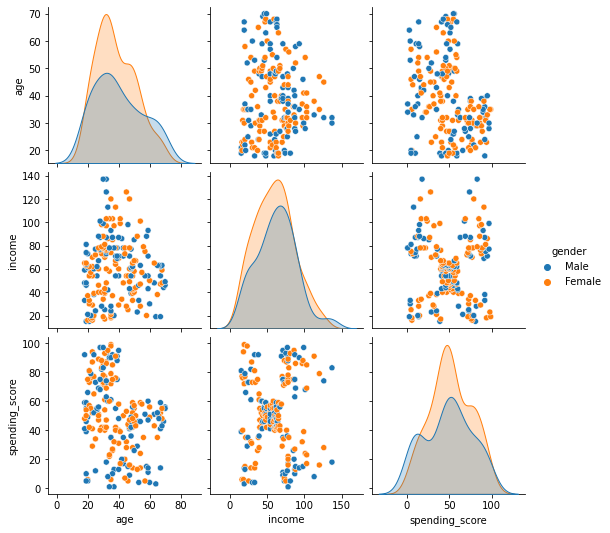

In [8]:
sns.pairplot(data = customer_df.loc[:,["age", "income","spending_score", "gender"]], hue = "gender")

## (2) Titanic
The sinking of the Titanic is one of the most infamous shipwrecks in history, resulting in the death of 1502 out of 2224 passengers and crew. 
- **class**: Ticket class  (First/Second/Third)
- **who**: sex (man/woman)
- **embarked**: Port of Embarkation 
- **alive**: yes/no

**(2.1) Load the seaborn dataset <code>titanic</code>. Select the following columns and save the subset to a csv file.**<br>
Hint: <code>DataFrame.to_csv("filename.csv", index = False)</code>
- class	
- who
- embark_town
- alive

In [9]:
# put your code here
titanic_df = sns.load_dataset("titanic")
titanic_df.loc[:,["class", "who", "embark_town","alive"]].to_csv("titanic.csv", index = False)

**(2.2) Import the dataset you saved in (2.1) and use it to complete the following tasks.** 

In [10]:
# put your code here
titanic_df = pd.read_csv("titanic.csv")
titanic_df.head(5)

,class,who,embark_town,alive
0,Third,man,Southampton,no
1,First,woman,Cherbourg,yes
2,Third,woman,Southampton,yes
3,First,woman,Southampton,yes
4,Third,man,Southampton,no


**(2.3) Count the number of passengers in different categories (man/woman/child) according to the column <code>who</code>. Display the result with a count plot.**

<AxesSubplot:xlabel='who', ylabel='count'>

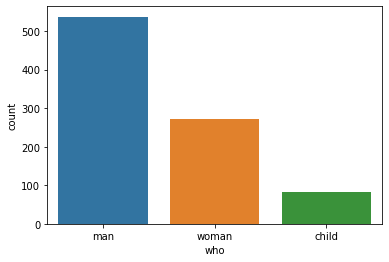

In [11]:
# put your code here
sns.countplot(data = titanic_df, x = "who")

**(2.4) Count the number of passengers in different categories (man/woman/child) according to the column <code>who</code>. Display the result with a count plot and use two bars to display the number of <code>alive</code> (yes/no) passengers in each category. Which category has the lowest survival rate?** 

<AxesSubplot:xlabel='who', ylabel='count'>

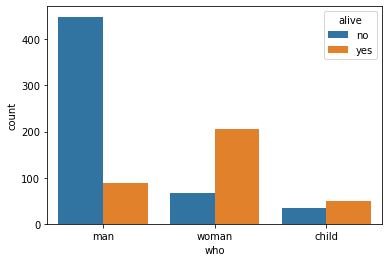

In [12]:
# put your code here
sns.countplot(data = titanic_df, x = "who", hue = "alive" )

**Write you answer here:**<br>
Male passengers have the lowest survival rate.

**(2.5) Use a cross table to display the numbers in (2.4).**<br>
Expected result:

|alive<br>who|no|yes|
|:-:|:-:|:-:|
|**child**|34|49|
|**man**|449|88|
|**woman**|66|205|

In [13]:
titanic_ct = pd.crosstab(titanic_df["who"], titanic_df["alive"])
titanic_ct

alive,no,yes
who,,
child,34,49
man,449,88
woman,66,205


**(2.6) Use a heat map to display the result in (2.4).**

<AxesSubplot:xlabel='alive', ylabel='who'>

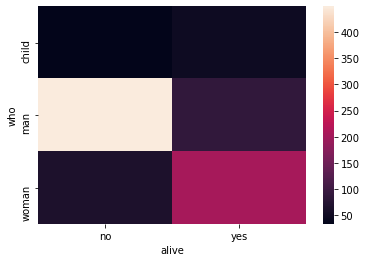

In [14]:
sns.heatmap(data = titanic_ct)

**(2.7) Use three subplots to show the number of surviving and non-surviving passengers in each <code>class</code>. Each subplot includes two bars: the number of surviving and non-surviving passengers.**<br>
Hint: <code>col = "class"</code>

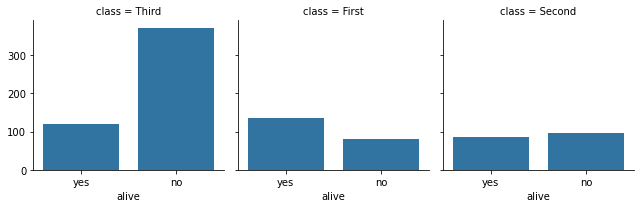

In [15]:
fig = sns.FacetGrid(data = titanic_df, col = "class")
fig.map(sns.countplot, "alive", order = ["yes","no"])